In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline 


In [2]:
#datasetler  
#vakalar/ölüler/iyileşenler
confirmed_df= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
#vakalar
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,91189,91251,91317,91358,91378,91418,91484,91533,91586,91670


In [4]:
#ölümler
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2561,2565,2572,2582,2592,2598,2611,2618,2625,2631
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2364,2367,2372,2378,2379,2383,2386,2389,2394,2396
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3181,3190,3198,3207,3217,3225,3234,3244,3253,3261
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,123,123,124,124,124,124,125,125,125,125
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,572,574,577,579,583,587,591,594,596,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3115,3138,3151,3167,3184,3201,3206,3231,3249,3249
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1157,1165,1175,1187,1205,1207,1216,1222,1226,1229
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1240,1245,1245,1246,1248,1249,1249,1250,1251,1251


In [5]:
#iyileşenler
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,52348,52363,52392,52489,52520,52794,52974,53103,53206,53272
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,103582,104278,105016,105728,106465,107163,107887,108606,109338,110172
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,83900,84038,84167,84299,84440,84598,84745,84940,85108,85249
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12375,12423,12458,12491,12519,12561,12590,12650,12684,12684
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22901,23089,23092,23092,23288,23341,23584,23606,23876,23913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2490,2490,2490,2516,2516,2516,2516,2516,2516,2548
256,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,256559,259105,260650,262602,264660,267346,268054,271233,272333,272333
257,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2393,2454,2486,2546,2630,2674,2700,2731,2751,2794
258,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,89117,89256,89403,89574,89678,89717,89743,89852,89933,90012


In [6]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/22/21', '4/23/21', '4/24/21', '4/25/21', '4/26/21', '4/27/21',
       '4/28/21', '4/29/21', '4/30/21', '5/1/21'],
      dtype='object', length=470)

In [7]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,0,0,0,0,0,0,0,0,0,0,...,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939
1,0,0,0,0,0,0,0,0,0,0,...,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185
2,0,0,0,0,0,0,0,0,0,0,...,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311
3,0,0,0,0,0,0,0,0,0,0,...,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232
4,0,0,0,0,0,0,0,0,0,0,...,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,2,2,2,2,2,2,2,2,2,...,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942
271,0,0,0,0,0,0,0,0,0,0,...,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462
272,0,0,0,0,0,0,0,0,0,0,...,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325
273,0,0,0,0,0,0,0,0,0,0,...,91189,91251,91317,91358,91378,91418,91484,91533,91586,91670


In [9]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,0,0,0,0,0,0,0,0,0,0,...,2561,2565,2572,2582,2592,2598,2611,2618,2625,2631
1,0,0,0,0,0,0,0,0,0,0,...,2364,2367,2372,2378,2379,2383,2386,2389,2394,2396
2,0,0,0,0,0,0,0,0,0,0,...,3181,3190,3198,3207,3217,3225,3234,3244,3253,3261
3,0,0,0,0,0,0,0,0,0,0,...,123,123,124,124,124,124,125,125,125,125
4,0,0,0,0,0,0,0,0,0,0,...,572,574,577,579,583,587,591,594,596,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
271,0,0,0,0,0,0,0,0,0,0,...,3115,3138,3151,3167,3184,3201,3206,3231,3249,3249
272,0,0,0,0,0,0,0,0,0,0,...,1157,1165,1175,1187,1205,1207,1216,1222,1226,1229
273,0,0,0,0,0,0,0,0,0,0,...,1240,1245,1245,1246,1248,1249,1249,1250,1251,1251


In [10]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21
0,0,0,0,0,0,0,0,0,0,0,...,52348,52363,52392,52489,52520,52794,52974,53103,53206,53272
1,0,0,0,0,0,0,0,0,0,0,...,103582,104278,105016,105728,106465,107163,107887,108606,109338,110172
2,0,0,0,0,0,0,0,0,0,0,...,83900,84038,84167,84299,84440,84598,84745,84940,85108,85249
3,0,0,0,0,0,0,0,0,0,0,...,12375,12423,12458,12491,12519,12561,12590,12650,12684,12684
4,0,0,0,0,0,0,0,0,0,0,...,22901,23089,23092,23092,23288,23341,23584,23606,23876,23913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,0,0,0,0,...,2490,2490,2490,2516,2516,2516,2516,2516,2516,2548
256,0,0,0,0,0,0,0,0,0,0,...,256559,259105,260650,262602,264660,267346,268054,271233,272333,272333
257,0,0,0,0,0,0,0,0,0,0,...,2393,2454,2486,2546,2630,2674,2700,2731,2751,2794
258,0,0,0,0,0,0,0,0,0,0,...,89117,89256,89403,89574,89678,89717,89743,89852,89933,90012


In [11]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/22/21', '4/23/21', '4/24/21', '4/25/21', '4/26/21', '4/27/21',
       '4/28/21', '4/29/21', '4/30/21', '5/1/21'],
      dtype='object', length=466)

In [12]:
world_cases = []
total_deaths = [] 
total_recovered = [] 
turkey_cases = []
turkey_deaths = []
turkey_recoveries = []

In [13]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)

    # case studies 
    turkey_cases.append(confirmed_df[confirmed_df['Country/Region']=='Turkey'][i].sum())
    turkey_deaths.append(deaths_df[deaths_df['Country/Region']=='Turkey'][i].sum())
    turkey_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Turkey'][i].sum())

In [14]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [15]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [16]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [17]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.36, shuffle=False) 

MAE: 17118849.695297033
MSE: 625064445634738.2


/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Tarih,SVR Dünyada Tahmin Edilen Vaka Sayısı
0,05/02/2021,207764191.0
1,05/03/2021,209095744.0
2,05/04/2021,210433012.0
3,05/05/2021,211776007.0
4,05/06/2021,213124742.0
5,05/07/2021,214479227.0
6,05/08/2021,215839477.0
7,05/09/2021,217205502.0
8,05/10/2021,218577316.0
9,05/11/2021,219954930.0


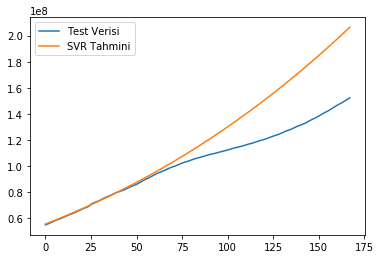

In [18]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.5)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Verisi', 'SVR Tahmini'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
# Future predictions using SVM 
svm_df = pd.DataFrame({'Tarih': future_forcast_dates[-10:], 'SVR Dünyada Tahmin Edilen Vaka Sayısı': np.round(svm_pred[-10:])})
svm_df


MAE: 2010971.9148534678
MSE: 5016047515734.702


,Tarih,SVR Türkiyede Tahmin Edilen Vaka Sayısı
0,05/02/2021,699219.0
1,05/03/2021,701680.0
2,05/04/2021,704146.0
3,05/05/2021,706617.0
4,05/06/2021,709094.0
5,05/07/2021,711576.0
6,05/08/2021,714063.0
7,05/09/2021,716555.0
8,05/10/2021,719053.0
9,05/11/2021,721556.0


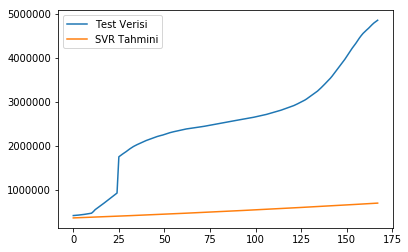

In [19]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, turkey_cases, test_size=0.36, shuffle=False) 
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.004)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Verisi', 'SVR Tahmini'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
# Future predictions using SVM 
svm_df = pd.DataFrame({'Tarih': future_forcast_dates[-10:], 'SVR Türkiyede Tahmin Edilen Vaka Sayısı': np.round(svm_pred[-10:])})
svm_df

MAE: 19471.332209567012
MSE: 431040052.7373292


,Tarih,SVR Türkiyede Tahmin Edilen Ölüm Sayısı
0,05/02/2021,6303.0
1,05/03/2021,6308.0
2,05/04/2021,6312.0
3,05/05/2021,6317.0
4,05/06/2021,6321.0
5,05/07/2021,6325.0
6,05/08/2021,6330.0
7,05/09/2021,6334.0
8,05/10/2021,6339.0
9,05/11/2021,6343.0


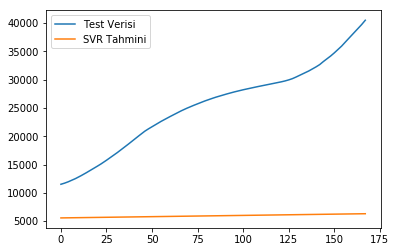

In [20]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, turkey_deaths, test_size=0.36, shuffle=False) 
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=1, C=0.02)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Verisi', 'SVR Tahmini'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
# Future predictions using SVM 
svm_df = pd.DataFrame({'Tarih': future_forcast_dates[-10:], 'SVR Türkiyede Tahmin Edilen Ölüm Sayısı': np.round(svm_pred[-10:])})
svm_df

MAE: 1222554.7872441506
MSE: 1780147407088.1667


,Tarih,SVR Türkiyede Tahmin Edilen İyileşen Sayısı
0,05/02/2021,2135983.0
1,05/03/2021,2153582.0
2,05/04/2021,2171294.0
3,05/05/2021,2189120.0
4,05/06/2021,2207061.0
5,05/07/2021,2225116.0
6,05/08/2021,2243287.0
7,05/09/2021,2261574.0
8,05/10/2021,2279977.0
9,05/11/2021,2298496.0


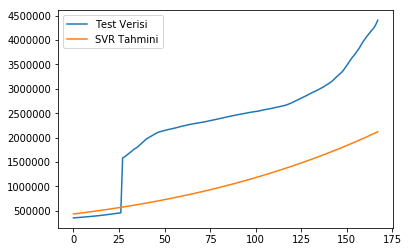

In [21]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, turkey_recoveries, test_size=0.36, shuffle=False) 
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.000016)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Verisi', 'SVR Tahmini'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
# Future predictions using SVM 
svm_df = pd.DataFrame({'Tarih': future_forcast_dates[-10:], 'SVR Türkiyede Tahmin Edilen İyileşen Sayısı': np.round(svm_pred[-10:])})
svm_df